In [2]:
from Training import Datacreate as dc
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
LeftEye_path = "./Recordings/Fall_2020/OpenBCISession_2020-10-11_16-33-50-YAN-LEFT-EYE/OpenBCI-RAW-2020-10-11_16-38-59.txt"
LeftEye_label_path = "./Recordings/Labels/yanLeftEye"

RightFoot_path = "./Recordings/Fall_2020/OpenBCISession_2020-10-11_16-26-10-YAN-RIGHT-FOOT/OpenBCI-RAW-2020-10-11_16-26-50.txt"
RightFoot_label_path = "./Recordings/Labels/yanRightFoot"

LeftFoot_path = "./Recordings/Fall_2020/OpenBCISession_2020-10-11_16-00-28-YAN-LEFT-FOOT/OpenBCI-RAW-2020-10-11_16-01-30.txt"
LeftFoot_label_path = "./Recordings/Labels/yanLeftFoot.txt.txt"

RightEye_path = "./Recordings/Fall_2020/OpenBCISession_2020-10-11_16-58-40-YAN-RIGHT-EYE/OpenBCI-RAW-2020-10-11_16-59-03.txt"
RightEye_label_path = "./Recordings/Labels/yanRightEye"

LeftEye_path = "./Recordings/Fall_2020/OpenBCISession_2020-10-11_16-33-50-YAN-LEFT-EYE/OpenBCI-RAW-2020-10-11_16-38-59.txt"
LeftEye_label_path = "./Recordings/Labels/yanLeftEye"

#RightFoot_observations = dc.getObservations(RightFoot_path, RightFoot_label_path, 1000, [0,1,2], 'R_FOOT')
#LeftFoot_observations = dc.getObservations(LeftFoot_path, LeftFoot_label_path, 1000, [0,1,2], 'L_FOOT')
RightEye_observations = dc.getObservations(RightEye_path, RightEye_label_path, 1000, [0,1,2], 'R_EYE')
LeftEye_observations = dc.getObservations(LeftEye_path, LeftEye_label_path, 1000, [0,1,2], 'L_EYE')

y_channels_groupsLE, ind_groupsLE, t_groupsLE, l_groupsLE = LeftEye_observations
y_channels_groupsRE, ind_groupsRE, t_groupsRE, l_groupsRE = RightEye_observations
#y_channels_groupsLF, ind_groupsLF, t_groupsLF, l_groupsLF = LeftFoot_observations
#y_channels_groupsRF, ind_groupsRF, t_groupsRF, l_groupsRF = RightFoot_observations

(3, 234, 193)


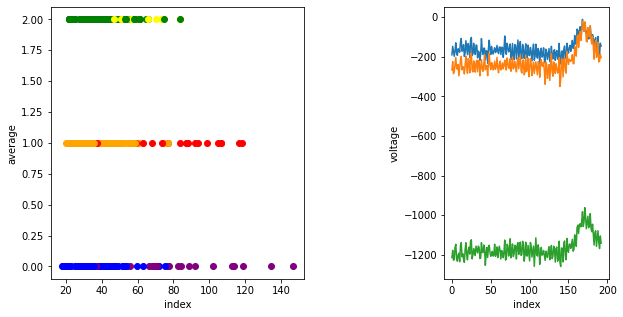

In [3]:
na_ind = 0 #non-action
a_ind = 32 #action

print(y_channels_groupsLE.shape)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.xlabel('index')
plt.ylabel('average')

colorgood = ('blue', 'orange', 'green')
colorbad = ('purple', 'red', 'yellow')
pos = -1
for channel_groups in y_channels_groupsLE:
    pos = (pos+1)%3
    for i in range(channel_groups.shape[0]):
        if(l_groupsLE[i][0] == 0):
            color = colorbad
        else:
            color = colorgood
        if(pos == 0):
            plt.plot(np.mean(np.abs(channel_groups[i] - np.ones_like(channel_groups[i]) * np.mean(channel_groups[i]))), 0, 'o', color = color[pos])
        if(pos == 1):
            plt.plot(np.mean(np.abs(channel_groups[i] - np.ones_like(channel_groups[i]) * np.mean(channel_groups[i]))), 1, 'o', color = color[pos])
        if(pos == 2):
            plt.plot(np.mean(np.abs(channel_groups[i] - np.ones_like(channel_groups[i]) * np.mean(channel_groups[i]))), 2, 'o', color = color[pos])


plt.subplot(1,3,2)
plt.xlabel('index')
plt.ylabel('voltage')
for channel_groups in y_channels_groupsLE:
    plt.plot(ind_groupsLE[a_ind], channel_groups[a_ind]), 
    
plt.subplot(1,3,3)
plt.xlabel('index')
plt.ylabel('voltage')
for channel_groups in y_channels_groupsLE:
    plt.plot(ind_groupsLE[na_ind], channel_groups[na_ind])

In [4]:
from sklearn import svm
#X = np.concatenate((np.transpose(np.mean(y_channels_groupsLE, axis=2)), np.transpose(np.mean(y_channels_groupsRE, axis=2)), np.transpose(np.mean(y_channels_groupsLF, axis=2)), np.transpose(np.mean(y_channels_groupsRF, axis=2))))
#y = -1*(np.concatenate((l_groupsLE, l_groupsRE, l_groupsLF, l_groupsRF)))
X = np.concatenate((np.transpose(np.mean(y_channels_groupsLE, axis=2)), np.transpose(np.mean(y_channels_groupsRE, axis=2))))
y = -1*(np.concatenate((l_groupsLE, l_groupsRE)))


#mean deviation 
processedXLE = np.transpose(np.mean(np.abs(y_channels_groupsLE - np.mean(y_channels_groupsLE, axis=2, keepdims=True)), axis=2))
processedXRE = np.transpose(np.mean(np.abs(y_channels_groupsRE - np.mean(y_channels_groupsRE, axis=2, keepdims=True)), axis=2))
print(processedXLE.shape, processedXRE.shape)
ProcessedX = np.concatenate((processedXLE, processedXRE))

#Using mean and mean deviation
# X = np.concatenate((X, ProcessedX), axis = 1)
#Using just mean deviation
X = ProcessedX

print(X.shape, y.shape)

X_combined = np.concatenate((X, y), axis = 1)

#undersampling
# print(X_combined.shape)
# from imblearn.under_sampling import RandomUnderSampler
# under_sampler = RandomUnderSampler(random_state=42)
# X_res, y_res = under_sampler.fit_resample(X_combined, y[:,0])
# print(X_res.shape, y_res.shape)
# X = X_res[:, 0:3]
# y = X_res[:, 3:8]

#oversampling
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=4)
X_res, y_res = over_sampler.fit_resample(X_combined, y[:,3])
y = X_res[:, X.shape[1]:X_combined.shape[1]]
over_sampler = RandomOverSampler(sampling_strategy = 0.5, random_state=4)
X_res, y_res = over_sampler.fit_resample(X_res, y[:,4])
X = X_res[:, 0:X.shape[1]]
y = X_res[:, X.shape[1]:X_combined.shape[1]]


# print("New Shapes", X.shape, y.shape)
# count = 0
# for g in y_res:
#     if g==-1:
#         count+=1
# print(count, y_res.size)
#print(f"Testing target statistics: {y}")

#test-train split
from sklearn.model_selection import train_test_split

X_res, X_test, y_res, y_test = train_test_split(X, y, test_size=0.33, random_state = 4)
X = X_res
y = y_res
clfLE = svm.SVC(probability=True)
clfLE.fit(X, y[:,3])
clfRE = svm.SVC(probability=True)
clfRE.fit(X, y[:,4])
# clfLF = svm.SVC(probability=True)
# clfLF.fit(X, y[:,1])
# clfRF = svm.SVC(probability=True)
# clfRF.fit(X, y[:,2])

(234, 3) (233, 3)
(467, 3) (467, 5)


SVC(probability=True)

In [5]:
correct = 0
total = 0
RecallRate =np.zeros([5, 2])
Precision = np.zeros([5, 2])


X = np.concatenate((np.transpose(np.mean(y_channels_groupsLE, axis=2)), np.transpose(np.mean(y_channels_groupsRE, axis=2))))
processedXLE = np.transpose(np.mean(np.abs(y_channels_groupsLE - np.mean(y_channels_groupsLE, axis=2, keepdims=True)), axis=2))
processedXRE = np.transpose(np.mean(np.abs(y_channels_groupsRE - np.mean(y_channels_groupsRE, axis=2, keepdims=True)), axis=2))
print(processedXLE.shape, processedXRE.shape)
X = np.concatenate((processedXLE, processedXRE))
y = -1*(np.concatenate((l_groupsLE, l_groupsRE)))

# X = np.concatenate((X_test, X))
# y = np.concatenate((y_test, y))

X = X_test
y = y_test

for i in range(X.shape[0]):
    maxVal = 0.5
    maxInd = 0
    #print(clfLE.predict(X[i].reshape(1, -1)))
    if(clfLE.predict_proba(X[i].reshape(1, -1))[0][0]>maxVal):
        maxVal = clfLE.predict_proba(X[i].reshape(1, -1))[0][0]
        maxInd = 3
    if(clfRE.predict_proba(X[i].reshape(1, -1))[0][0]>maxVal):
        maxVal = clfRE.predict_proba(X[i].reshape(1, -1))[0][0]
        maxInd = 4
    # if(clfLF.predict_proba(X[i].reshape(1, -1))[0][0]>maxVal):
    #     maxVal = clfLF.predict_proba(X[i].reshape(1, -1))[0][0]
    #     maxInd = 1
    # if(clfRF.predict_proba(X[i].reshape(1, -1))[0][0]>maxVal):
    #     maxVal = clfRF.predict_proba(X[i].reshape(1, -1))[0][0]
    #     maxInd = 2
    # resArr = np.zeros(5)
    # resArr[0] = 0.5
    # resArr[1] = 0
    # resArr[2] = 0
    # resArr[3] = clfLE.predict_proba(X[i].reshape(1, -1))[0][0]
    # resArr[4] = clfRE.predict_proba(X[i].reshape(1, -1))[0][0]
#    if(maxInd != 0):
#    print(maxInd, resArr, y[i])
    if(y[i][maxInd]==-1):
        correct+=1
        Precision[maxInd][0]+=1
        RecallRate[maxInd][0]+=1
    for xx in range(5):
        if(y[i][xx]==-1):
            RecallRate[xx][1]+=1
    total+=1
    Precision[maxInd][1]+=1
print(correct/total)
print("Recall")
for row in RecallRate:
    print(row, row[0]/row[1])
print("Precision")
for row in Precision:
    print(row, row[0]/row[1])

(234, 3) (233, 3)
0.9354838709677419
Recall
[145. 152.] 0.9539473684210527
[0. 0.] nan
[0. 0.] nan
[125. 133.] 0.9398496240601504
[136. 149.] 0.912751677852349
Precision
[145. 166.] 0.8734939759036144
[0. 0.] nan
[0. 0.] nan
[125. 130.] 0.9615384615384616
[136. 138.] 0.9855072463768116


C:\Users\anshs\AppData\Local\Temp\ipykernel_25100\2605386598.py:56: RuntimeWarning: invalid value encountered in double_scalars
  print(row, row[0]/row[1])
C:\Users\anshs\AppData\Local\Temp\ipykernel_25100\2605386598.py:59: RuntimeWarning: invalid value encountered in double_scalars
  print(row, row[0]/row[1])
